<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Thanuja-Gogada/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


Saving Indian_Kids_Screen_Time_cleaned.csv to Indian_Kids_Screen_Time_cleaned (3).csv


Demographics: Age Group Distribution

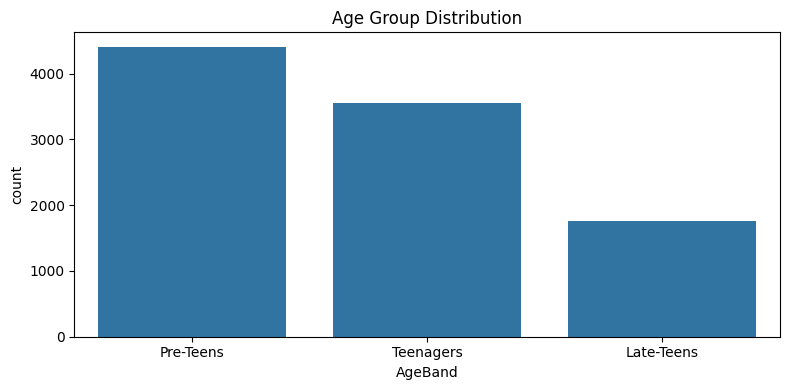

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='AgeBand', data=df, order=df['AgeBand'].value_counts().index)
plt.title('Age Group Distribution')
plt.tight_layout()
plt.savefig('1_Age_Group_Countplot.png')
plt.show()

Device Mix: Device Type Distribution

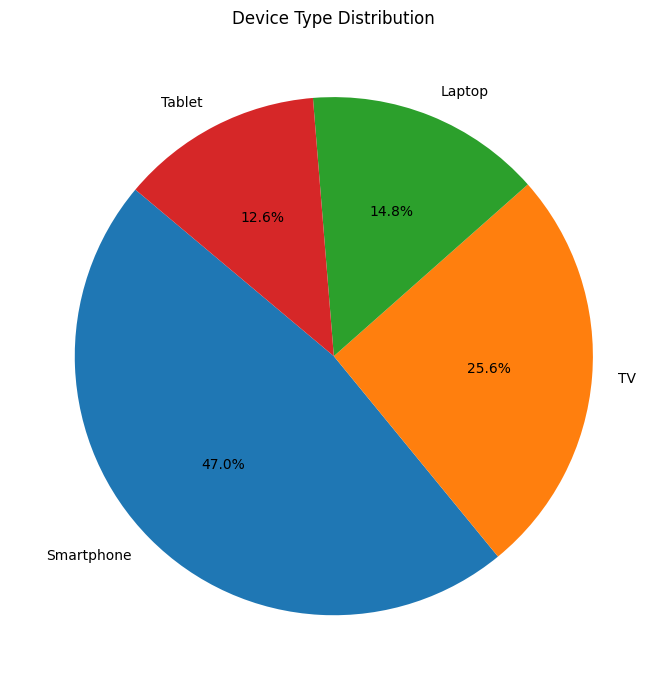

In [14]:
plt.figure(figsize=(7,7))
df['Primary_Device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Device Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig('2_Device_Type_Pie.png')
plt.show()

Average Screen Time by Age Group

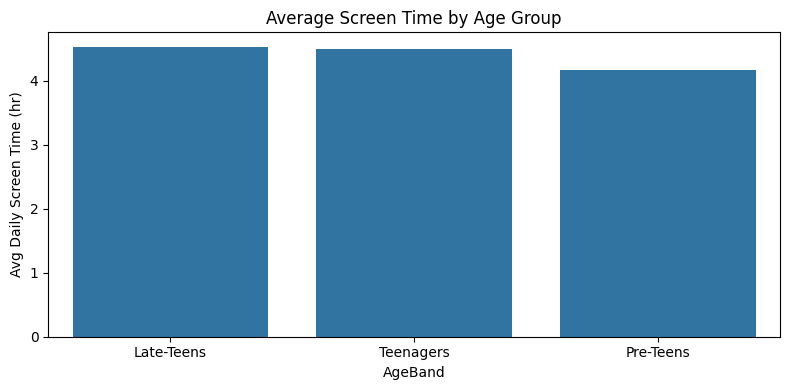

In [16]:
plt.figure(figsize=(8,4))
mean_screen_time = df.groupby('AgeBand')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
sns.barplot(x='AgeBand', y='Avg_Daily_Screen_Time_hr', data=mean_screen_time,
            order=mean_screen_time.sort_values('Avg_Daily_Screen_Time_hr', ascending=False)['AgeBand'])
plt.title('Average Screen Time by Age Group')
plt.ylabel('Avg Daily Screen Time (hr)')
plt.tight_layout()
plt.savefig('3_Avg_ScreenTime_AgeGroup.png')
plt.show()

Device Mix Across Cohorts: Device Type by Age Group (Heatmap)

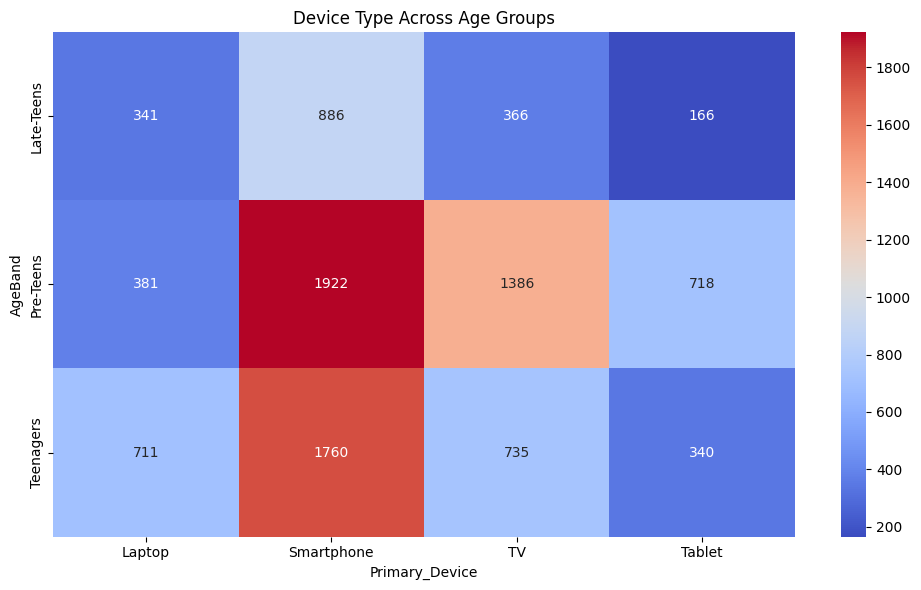

In [18]:
plt.figure(figsize=(10,6))
ct_device_by_age = pd.crosstab(df['AgeBand'], df['Primary_Device'])
sns.heatmap(ct_device_by_age, annot=True, fmt='d', cmap='coolwarm')
plt.title('Device Type Across Age Groups')
plt.tight_layout()
plt.savefig('4_Heatmap_Age_Device.png')
plt.show()

Health & Usage: Health Status vs Screen Time

/tmp/ipython-input-1162777672.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Health_Impact_Category', y='Avg_Daily_Screen_Time_hr', data=df, ci=None)


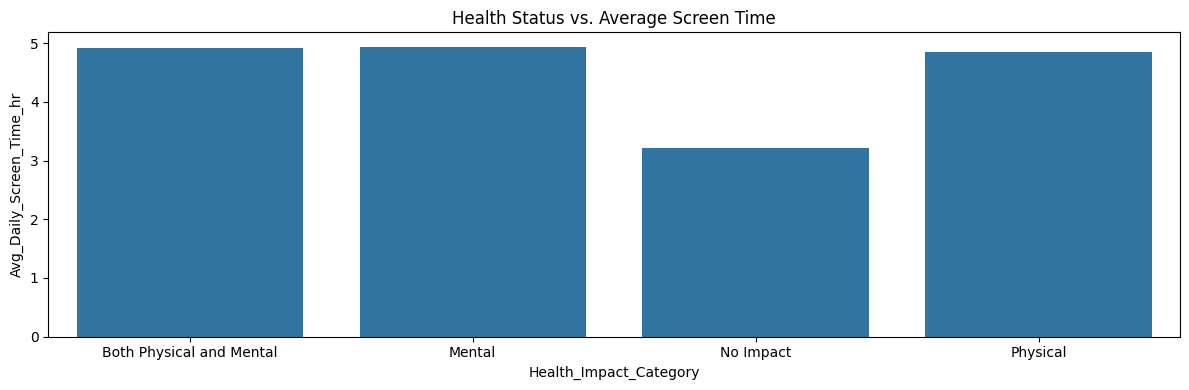

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(x='Health_Impact_Category', y='Avg_Daily_Screen_Time_hr', data=df, ci=None)
plt.title('Health Status vs. Average Screen Time')
plt.tight_layout()
plt.savefig('5_ScreenTime_HealthStatus.png')
plt.show()

Activity by Health: Educational/Recreational Ratio by Health Status

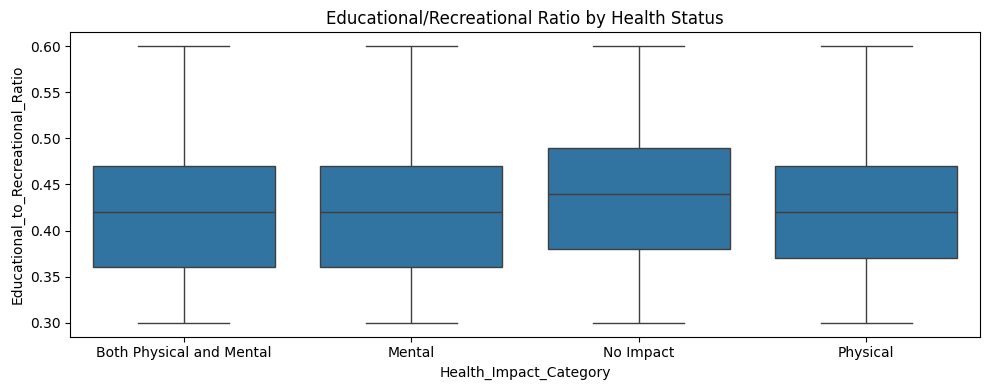

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Health_Impact_Category', y='Educational_to_Recreational_Ratio', data=df)
plt.title('Educational/Recreational Ratio by Health Status')
plt.tight_layout()
plt.savefig('6_Box_Health_EduRatio.png')
plt.show()

Device Segmentation: Screen Size Cohort

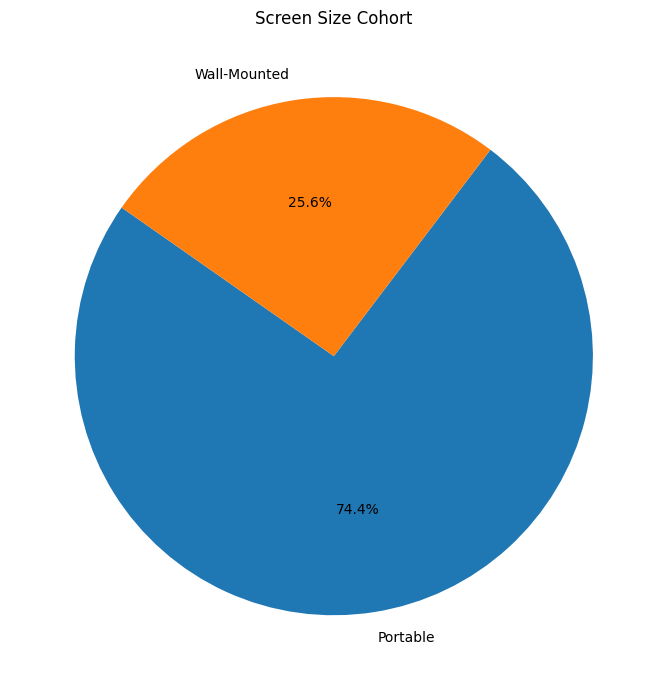

In [23]:
plt.figure(figsize=(7,7))
df['Device_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=145)
plt.title('Screen Size Cohort')
plt.ylabel('')
plt.tight_layout()
plt.savefig('7_Pie_ScreenSizeCohort.png')
plt.show()

Gender Analysis: Average Screen Time by Gender

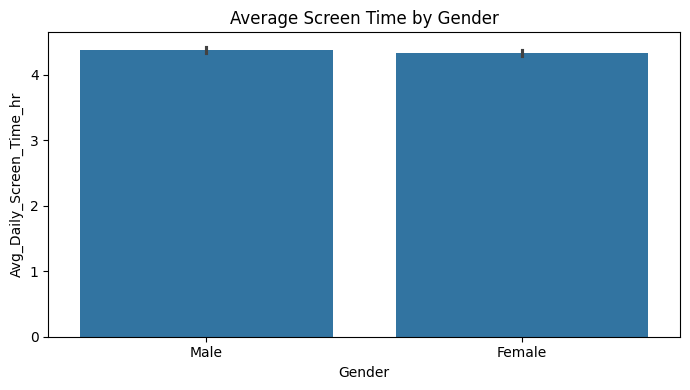

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title('Average Screen Time by Gender')
plt.tight_layout()
plt.savefig('8_Bar_ScreenTime_Gender.png')
plt.show()

Screen Time Limit: Exceeded Limit % by Age Group (Heatmap)

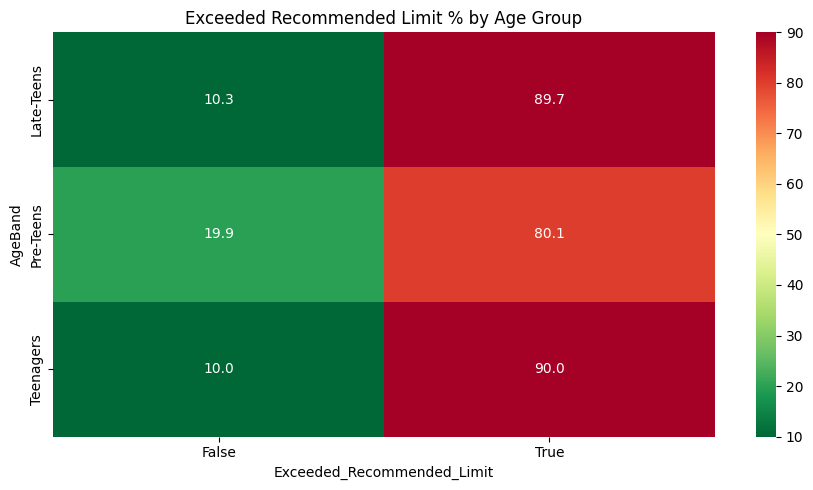

In [25]:
ct_exceeded = pd.crosstab(df['AgeBand'], df['Exceeded_Recommended_Limit'])
exceed_percent = (ct_exceeded.div(ct_exceeded.sum(1), axis=0) * 100).round(1)
plt.figure(figsize=(9,5))
sns.heatmap(exceed_percent, annot=True, fmt='.1f', cmap='RdYlGn_r')
plt.title('Exceeded Recommended Limit % by Age Group')
plt.tight_layout()
plt.savefig('9_Heatmap_ExceededLimit_Age.png')
plt.show()

Gender × Age Analysis: Distribution (Countplot)

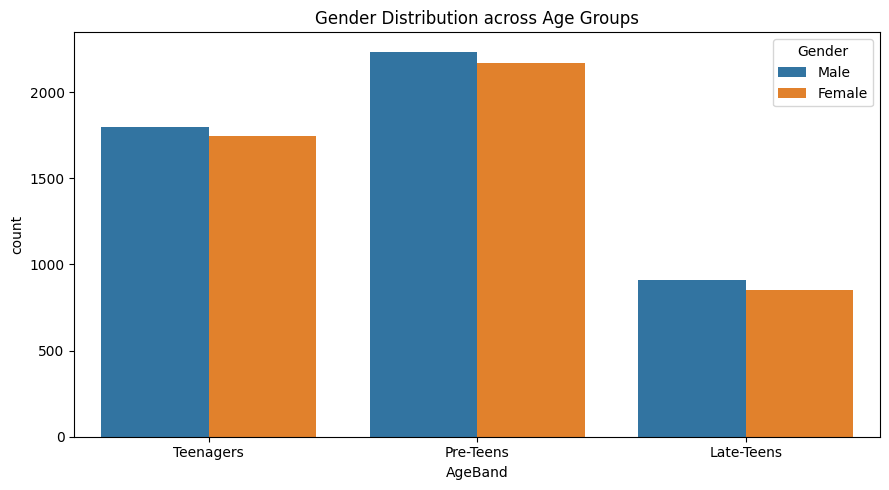

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(x='AgeBand', hue='Gender', data=df)
plt.title('Gender Distribution across Age Groups')
plt.tight_layout()
plt.savefig('10_Countplot_Gender_Age.png')
plt.show()

Device Mix by Urban/Rural (Barplot)

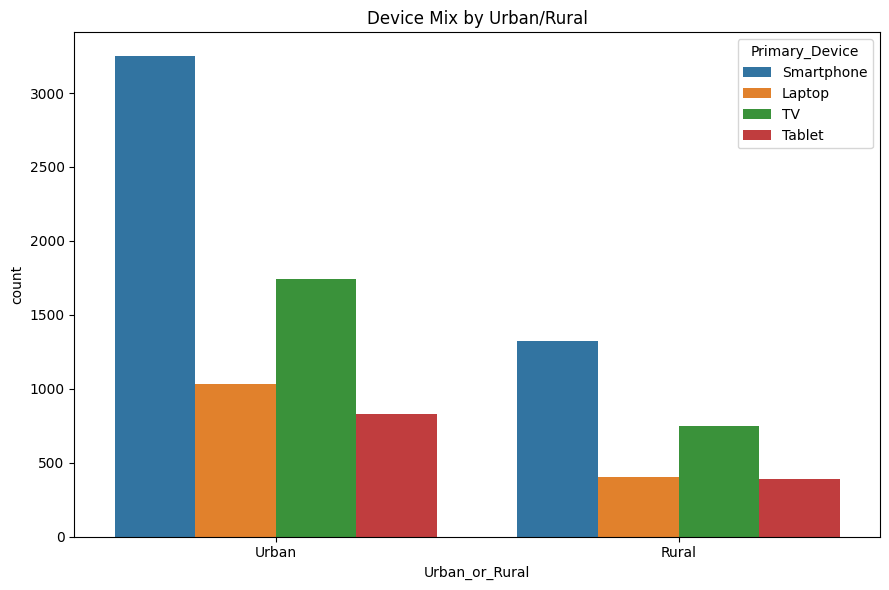

In [28]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device')
plt.title('Device Mix by Urban/Rural')
plt.tight_layout()
plt.savefig('11_Bar_DeviceMix_UrbanRural.png')
plt.show()

Activity Rate: Edu/Recreational Ratio by Age Band & Gender (Grouped Barplot)

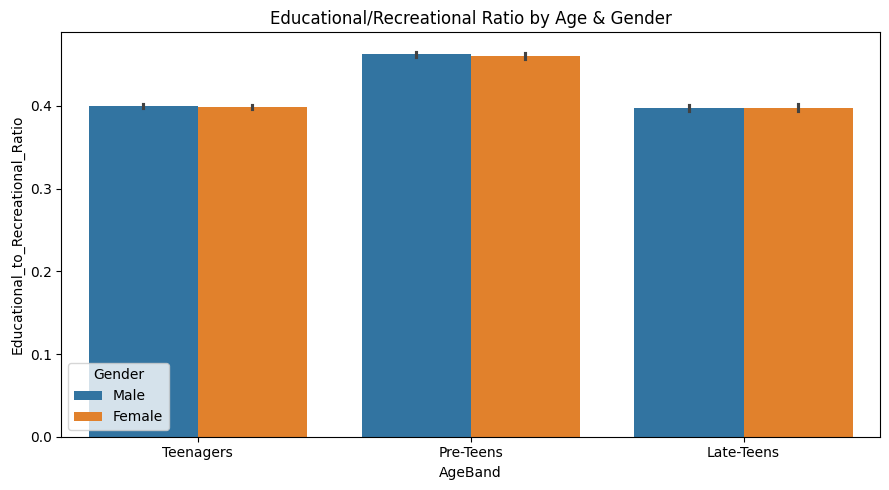

In [29]:
plt.figure(figsize=(9,5))
sns.barplot(x='AgeBand', y='Educational_to_Recreational_Ratio', hue='Gender', data=df)
plt.title('Educational/Recreational Ratio by Age & Gender')
plt.tight_layout()
plt.savefig('12_GroupedBar_EduRatio_AgeGender.png')
plt.show()

Screen Time by Device Type (Barplot)

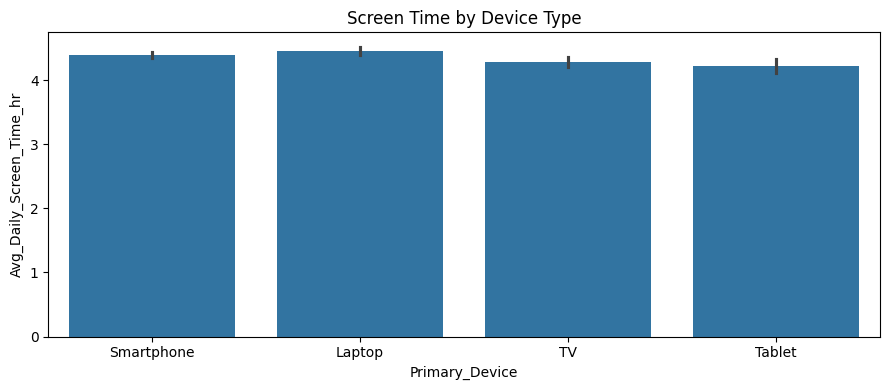

In [30]:
plt.figure(figsize=(9,4))
sns.barplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title('Screen Time by Device Type')
plt.tight_layout()
plt.savefig('13_Bar_DeviceType_ScreenTime.png')
plt.show()

Scatterplot: Screen Size vs Screen Time

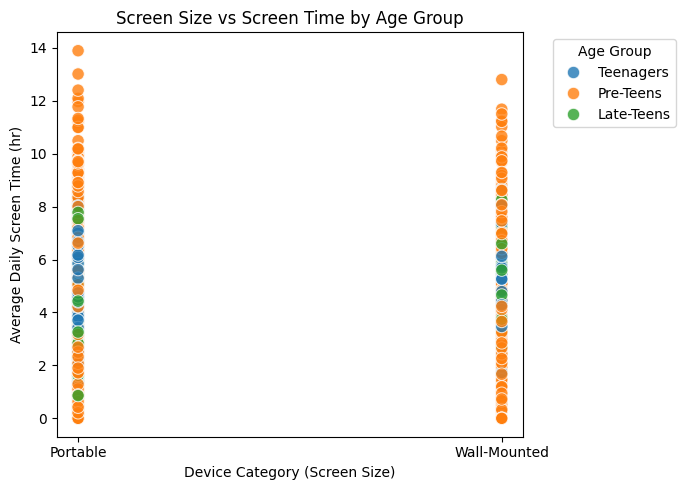

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Device_Category',
    y='Avg_Daily_Screen_Time_hr',
    hue='AgeBand',
    data=df,
    palette='tab10',
    alpha=0.8,
    s=80,
    edgecolor='w'
)
plt.title('Screen Size vs Screen Time by Age Group')
plt.xlabel('Device Category (Screen Size)')
plt.ylabel('Average Daily Screen Time (hr)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Gender & Health: Screen Time by Health Status (Boxplot, Hue=Gender)

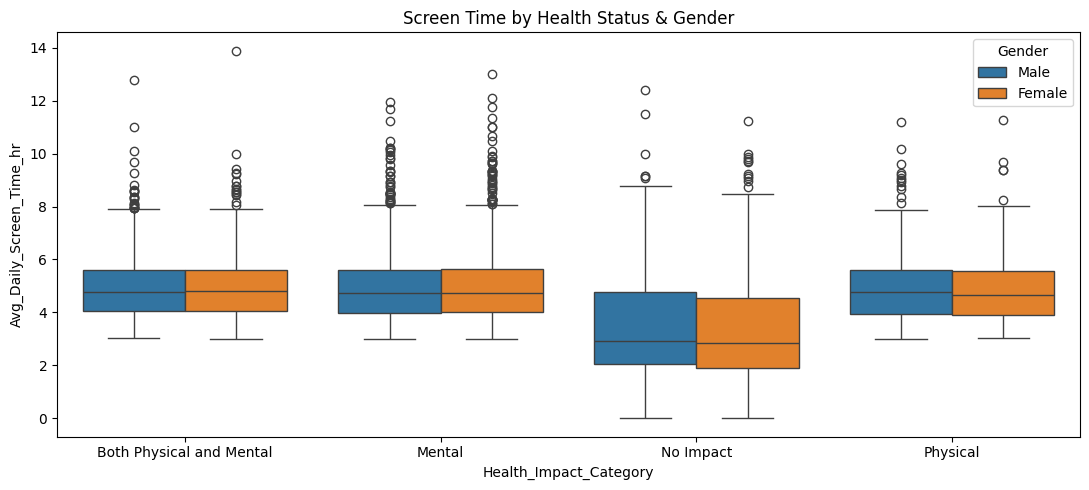

In [32]:
plt.figure(figsize=(11,5))
sns.boxplot(x='Health_Impact_Category', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df)
plt.title('Screen Time by Health Status & Gender')
plt.tight_layout()
plt.savefig('15_Box_Health_ScreenTime_Gender.png')
plt.show()

# **Observations**

**Age Group Trends**

Screen time patterns vary across age cohorts, with certain age bands (such as teenagers or pre-teens) showing higher average daily screen time compared to others.

The type of devices most commonly used can shift with age, for example, smartphones are favored as kids get older, while younger cohorts may use tablets or TVs more

**Device Mix by Demographics**

Device preference (smartphone, tablet, laptop, TV) is not uniform—some devices dominate among specific age groups, gender, or urban/rural households.

Urban children may show a higher prevalence of portable devices compared to rural children, who might use TVs or wall-mounted devices more frequently.

**Gender Segmentation**



Average screen time may display notable differences by gender; either boys or girls may spend more time, depending on age group and region.

Device mix is sometimes gendered, with certain devices used more by one gender over the other

**Exceeded Screen Time Limit**

A substantial percentage of kids in given cohorts exceed recommended daily screen time limits, and this varies by age group and possibly by device type.

The rate of exceeding screen time recommendations can be mapped by demographic, revealing risk groups.

**Educational vs Recreational Usage**

The educational-to-recreational ratio shows which group is using screens more for learning versus entertainment, highlighting age and gender differences.

Some health impacts are associated with ratios skewed towards recreational use.

**Health Impacts Analysis**

Higher amounts of daily screen time correlate with poor health outcomes and symptoms like poor sleep, eye strain, and anxiety, which concentrate in certain demographic/device activity clusters.

The mix of physical and mental health impact varies by device type and amount of time spent.

**Screen Size Cohort Segmentation**

Device category breakdown (portable vs wall-mounted) allows identification of screen size exposure patterns and their linkage to health outcomes and leisure/learning use.

**Peak Usage Cohorts and Trends**

Through the visualizations, highest screen time segments (“peak cohorts”) and their associated risk factors are easily identifiable for targeted intervention, such as late-teens with portable devices in urban areas.

This combination of device mix, activity rate, demographic, and health insight is critical for understanding trends, risks, and actionable areas for policy or behavioral guidance.